### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [11]:
data = pd.read_csv('data/coupons.csv')

In [13]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [16]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [30]:
data_cleaned = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[data_cleaned] = data[data_cleaned].fillna('never')

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,never,never,missing,4~8,1~3
1,never,never,missing,4~8,1~3
2,never,never,missing,4~8,1~3
3,never,never,missing,4~8,1~3
4,never,never,missing,4~8,1~3


In [34]:
data[data_cleaned] = data[data_cleaned].replace('missing', 'never')
data[data_cleaned].head()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,never,never,never,4~8,1~3
1,never,never,never,4~8,1~3
2,never,never,never,4~8,1~3
3,never,never,never,4~8,1~3
4,never,never,never,4~8,1~3


4. What proportion of the total observations chose to accept the coupon?



In [38]:
acceptance = data['Y']. mean()
print(f"Proportion of customers who accepted the coupon: {acceptance:.2f}")

Proportion of customers who accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

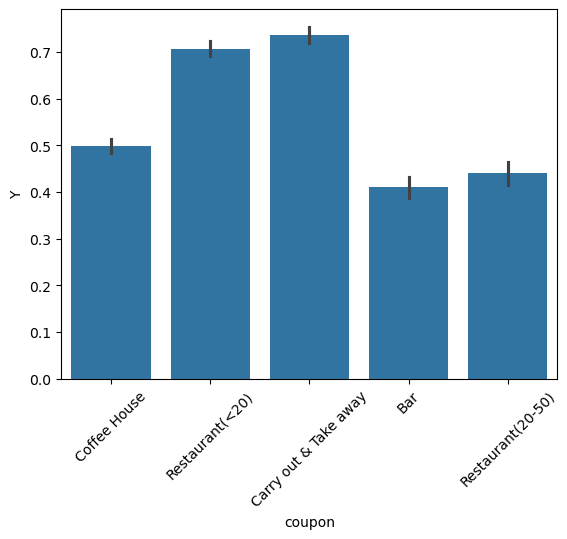

In [42]:
sns.barplot(data = data, x ='coupon', y='Y', order = data['coupon'].value_counts().index)
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

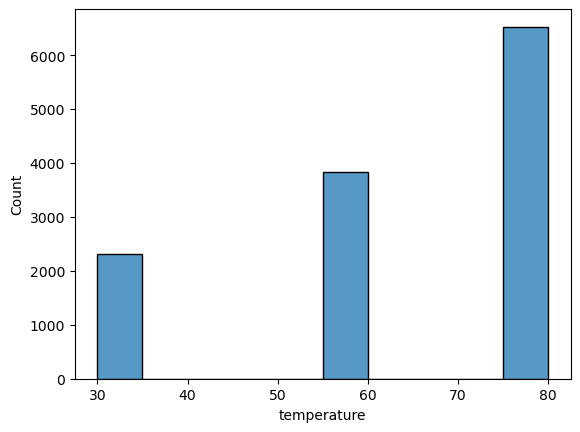

In [46]:
sns.histplot(data['temperature'], bins = 10, kde=False)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [56]:
barcoupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [58]:
barcoupons_acceptance = barcoupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {barcoupons_acceptance:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [77]:
#Groups with 3 or fewer visits per month
bar_low = barcoupons[barcoupons['Bar'].isin(['never', 'less1', '1~3'])]
#Groups with more than 3 visits per month 
bar_high = barcoupons[barcoupons['Bar'].isin(['4~8'])]

acceptance_low = bar_low['Y'].mean()
acceptance_high = bar_high['Y'].mean()

print(f"Acceptance rate of less than 3x: {acceptance_low:.2f}")
print(f"Acceptance rate of more than 3x: {acceptance_high:.2f}")

Acceptance rate of less than 3x: 0.37
Acceptance rate of more than 3x: 0.78


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [96]:
barcoupons = data[data['coupon'] == 'Bar'].copy()
barcoupons['age'] = pd.to_numeric(barcoupons['age'], errors='coerce')

In [100]:
drivers1 = barcoupons[(barcoupons['Bar'].isin(['4~8'])) & (barcoupons['age'] > 25)]
drivers2 = barcoupons[~((barcoupons['Bar'].isin(['4~8'])) & (barcoupons['age'] > 25))]

print(drivers1.head())
print(drivers2.head())

         destination  passanger weather  temperature  time coupon expiration  \
569  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
580             Home      Alone   Sunny           55   6PM    Bar         1d   
584             Work      Alone   Sunny           55   7AM    Bar         1d   
591  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
602             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender   age maritalStatus  ...  CoffeeHouse CarryAway  \
569   Male  31.0        Single  ...          gt8       gt8   
580   Male  31.0        Single  ...          gt8       gt8   
584   Male  31.0        Single  ...          gt8       gt8   
591   Male  26.0        Single  ...        never       4~8   
602   Male  26.0        Single  ...        never       4~8   

    RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
569                  1~3            less1                1        

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [104]:
other_occupations = ['farming', 'fishing', 'forestry']
drivers1 = barcoupons[(barcoupons['Bar'].isin(['4~8', 'gt8'])) & (barcoupons['passanger'] !='Kid(s)') & (~barcoupons['occupation'].str.lower().isin(other_occupations))].copy()
print(drivers1.head())

         destination  passanger weather  temperature  time coupon expiration  \
156  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
167             Home      Alone   Sunny           55   6PM    Bar         1d   
171             Work      Alone   Sunny           55   7AM    Bar         1d   
454  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
465             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender   age maritalStatus  ...  CoffeeHouse CarryAway  \
156   Male  26.0        Single  ...          gt8       gt8   
167   Male  26.0        Single  ...          gt8       gt8   
171   Male  26.0        Single  ...          gt8       gt8   
454   Male  31.0        Single  ...          gt8       gt8   
465   Male  31.0        Single  ...          gt8       gt8   

    RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
156                  gt8              gt8                1        

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [113]:
#going to bars more than once, had passangers that were not kids, or widowed 
drivers1 = data[(data['Bar'].isin(['4~8', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] !='Widowed')]


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Drivers who visit bars more frequently and are younger are more likely to accept bar coupons. Additionly, passangers who are not kids and not being widowed are more likely to accept bar coupons as well

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [156]:
#Coffee House 
coffeehouse = data[data['coupon'] == 'Coffee House'].copy()
print(coffeehouse.shape)

(3996, 25)


In [162]:
#marital status and coupon acceptance
yes_acceptance = coffeehouse[coffeehouse['Y'] == 1].groupby('maritalStatus').size()
no_acceptance = coffeehouse[coffeehouse['Y'] == 0].groupby('maritalStatus').size()

acceptance_YN = pd.DataFrame({'Accepted': yes_acceptance, 'Rejected': acceptance}).fillna(0)

acceptance_YN['Acceptance Rate(%)'] = (acceptance_YN['Accepted'] / (acceptance_YN['Accepted'] + acceptance_YN['Rejected'])) * 100

print(acceptance_YN)



                   Accepted  Rejected  Acceptance Rate(%)
maritalStatus                                            
Divorced                 79  0.568433           99.285605
Married partner         760  0.568433           99.925262
Single                  800  0.568433           99.928996
Unmarried partner       343  0.568433           99.834550
Widowed                  13  0.568433           95.810624
